## Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import folium
import os
from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go
pd.set_option('display.max_rows',20000, 'display.max_columns',100)

## INDIA CORONA CASES ANALYSIS

In [2]:
df_corona_in_india = pd.read_csv("./New_Data/covid_19_india.csv")
df_corona_india = pd.read_csv("./New_Data/complete.csv")
df_ICMR = pd.read_csv("./New_Data/ICMRTestingDetails.csv")
df_Individual = pd.read_csv("./New_Data/IndividualDetails.csv")
df_Hospital = pd.read_csv("./New_Data/HospitalBedsIndia.csv")
df_Age = pd.read_csv("./New_Data/AgeGroupDetails.csv")
# df_Italy = pd.read_csv("../input/covid19-in-italy/covid19_italy_region.csv")
# df_daily_US = pd.read_csv("../input/covid19-in-usa/us_states_covid19_daily.csv")
# df_daily_USA = pd.read_csv("../input/covid19-in-usa/us_covid19_daily.csv")
df_lab = pd.read_csv("./New_Data/ICMRTestingLabs.csv")
#df_utm_lab = pd.read_csv("../input/covid-center-utm/City_Lat_Lon.csv")
df_statewise = pd.read_csv("./New_Data/StatewiseTestingDetails.csv")
df_population_of_india = pd.read_csv("./New_Data/population_india_census2011.csv")
# df_with_utm = pd.read_csv("../input/utm-of-india/UTM ZONES of INDIA.csv")

In [3]:
#Total cases of corona in India
df_corona_in_india['Total Cases'] = df_corona_in_india['Cured'] + df_corona_in_india['Deaths'] + df_corona_in_india['Confirmed']
#Active cases of corona in India
df_corona_in_india['Active Cases'] = df_corona_in_india['Total Cases'] - df_corona_in_india['Cured'] - df_corona_in_india['Deaths']
df_corona_in_india.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Total Cases,Active Cases
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1,1,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1,1,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2,2,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3,3,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3,3,3


In [6]:
df_corona_in_india['Date'] =pd.to_datetime(df_corona_in_india.Date,dayfirst=True)

In [7]:
#Daily Cases in India Datewise
corona_data = df_corona_in_india.groupby(['Date'])['Cured'].sum().reset_index().sort_values('Cured',ascending = True)

fig = px.bar(corona_data, y='Cured', x='Date',hover_data =['Cured'], color='Cured', height=600,color_continuous_scale=["blue","red"])
fig.update_layout(
    title='Cured Cases in India Datewise')
fig.show()

In [8]:
#Daily Cases in India Datewise
corona_data = df_corona_in_india.groupby(['Date'])['Total Cases'].sum().reset_index().sort_values('Total Cases',ascending = True)
corona_data['Daily Cases'] = corona_data['Total Cases'].sub(corona_data['Total Cases'].shift())
corona_data['Daily Cases'].iloc[0] = corona_data['Total Cases'].iloc[0]
corona_data['Daily Cases'] = corona_data['Daily Cases'].astype(int)
fig = px.bar(corona_data, y='Daily Cases', x='Date',hover_data =['Daily Cases'], color='Daily Cases', height=600,color_continuous_scale=["blue","red"])
fig.update_layout(
    title='Daily Cases in India Datewise')
fig.show()

In [9]:
#Total Cases in India Datewise
corona_data = df_corona_in_india.groupby(['Date'])['Total Cases'].sum().reset_index().sort_values('Total Cases',ascending = True)
fig = px.bar(corona_data, y='Total Cases', x='Date',hover_data =['Total Cases'], color='Total Cases', height=600,color_continuous_scale=["blue","red"])
fig.update_layout(title='Total Cases in India Datewise')
fig.show()

In [10]:
# pct_change is used to obtain the percentage change in consecutive rows.
corona_data['Corona Growth Rate'] = corona_data['Total Cases'].pct_change().mul(100).round(2)
#Corona Growth Rate Comparison with Previous Day
fig = px.bar(corona_data, y='Corona Growth Rate', x='Date',hover_data =['Corona Growth Rate','Total Cases'], height=600,color_continuous_scale=["blue","red"])
fig.update_layout(title='Corona Growth Rate(in Percentage) Comparison with Previous Day')
fig.show()

In [11]:
#Moratality Rate
corona_data = df_corona_in_india.groupby(['Date'])['Total Cases','Active Cases','Deaths'].sum().reset_index().sort_values('Date',ascending=False)
corona_data['Mortality Rate'] = ((corona_data['Deaths']/corona_data['Total Cases'])*100) #(Death/ total cases)*100
fig = go.Figure()
fig.add_trace(go.Scatter(x=corona_data['Date'], y=corona_data['Mortality Rate'],mode='lines+markers',name='Cases',marker_color='red'))
fig.update_layout(title_text='COVID-19 Mortality Rate in INDIA',plot_bgcolor='rgb(225,230,255)' ,xaxis_title="Date",
    yaxis_title="Mortality Rate")
fig.show()

In [12]:
#DAILY DEATHS IN INDIA
corona_data = df_corona_in_india.groupby(['Date'])['Deaths'].sum().reset_index().sort_values('Deaths',ascending = True)
corona_data['DAILY DEATHS'] = corona_data['Deaths'].sub(corona_data['Deaths'].shift())
corona_data['DAILY DEATHS'].iloc[0] = corona_data['Deaths'].iloc[0]
corona_data['DAILY DEATHS'] = corona_data['DAILY DEATHS'].astype(int)
fig = px.bar(corona_data, y='DAILY DEATHS', x='Date',hover_data =['DAILY DEATHS'], color='DAILY DEATHS', height=600,color_continuous_scale=["blue","red"])
fig.update_layout(
    title='DAILY DEATHS IN INDIA')
fig.show()

In [13]:
#DAILY DEATHS IN INDIA
corona_data = df_corona_in_india.groupby(['Date'])['Deaths'].sum().reset_index().sort_values('Deaths',ascending = True)
fig = px.bar(corona_data, y='Deaths', x='Date',hover_data =['Deaths'], color='Deaths', height=600,color_continuous_scale=["blue","red"])
fig.update_layout(
    title='DEATHS IN INDIA')
fig.show()

In [14]:
#Recovery Rate
corona_data = df_corona_in_india.groupby(['Date'])['Total Cases','Active Cases','Cured'].sum().reset_index().sort_values('Date',ascending=False)
corona_data['Recovery Rate'] = ((corona_data['Cured']/corona_data['Total Cases'])*100)
fig = go.Figure()
corona_data = corona_data[3:]
fig.add_trace(go.Scatter(x=corona_data['Date'], y=corona_data['Recovery Rate'],
                    mode='lines+markers',name='Cases',marker_color='green'))


fig.update_layout(title_text='COVID-19 Recovery Rate in INDIA',plot_bgcolor='rgb(225,230,255)',xaxis_title="Date",
    yaxis_title="Recovery Rate")
fig.show()

In [15]:
#DAILY Recovery IN INDIA
corona_data = df_corona_in_india.groupby(['Date'])['Cured'].sum().reset_index().sort_values('Cured',ascending = True)
corona_data['DAILY RECOVERY'] = corona_data['Cured'].sub(corona_data['Cured'].shift())
corona_data['DAILY RECOVERY'].iloc[0] = corona_data['Cured'].iloc[0]
corona_data['DAILY RECOVERY'] = corona_data['DAILY RECOVERY'].astype(int)
fig = px.bar(corona_data, y='DAILY RECOVERY', x='Date',hover_data =['DAILY RECOVERY'], color='DAILY RECOVERY', height=600,color_continuous_scale=["blue","red"])
fig.update_layout(
    title='DAILY RECOVERY IN INDIA')
fig.show()

In [16]:
#DAILY DEATHS IN INDIA
corona_data = df_corona_in_india.groupby(['Date'])['Cured'].sum().reset_index().sort_values('Cured',ascending = True)
fig = px.bar(corona_data, y='Cured', x='Date',hover_data =['Cured'], color='Cured', height=600,color_continuous_scale=["blue","red"])
fig.update_layout(
    title='TOTAL CURED IN INDIA')
fig.show()

In [17]:
#Total Cases in Indian States Datewise
corona_data = df_corona_in_india.groupby(['Date','State/UnionTerritory','Total Cases'])['Cured','Deaths','Active Cases'].sum().reset_index().sort_values('Total Cases',ascending = False)
fig = px.bar(corona_data, y='Total Cases', x='Date',hover_data =['State/UnionTerritory','Active Cases','Deaths','Cured'], color='Total Cases',barmode='group', height=600,color_continuous_scale=["blue","red"])
fig.update_layout(
    title='Indian States with Current Total Corona Cases')
fig.show()

In [18]:
#Pie chart visualization of states effected by coronavirus
fig = px.pie(df_Age, values='TotalCases', names='AgeGroup')
fig.update_layout(
    title='Age Group affected with COVID-19')
fig.show()

## Forecasting In India Using Prophet Model(Time Series Analysis)

In [35]:
# Adding the period of lockdown in India as on 26/04/2020
holiday = pd.DataFrame(
                        {
                        'holiday' : 'LockDown',
                        'ds': pd.date_range(start="2020-03-24",end="2020-05-18"),
                        'lower_window': 0,
                        'upper_window': 0
                        }
)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-02-05 00:00:00 and 2020-04-05 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.


           ds          trend     yhat_lower     yhat_upper    trend_lower  \
0  2020-05-06   57171.684599   55808.724000   58415.060062   57170.795986   
1  2020-05-07   59367.791297   57765.136977   60439.599490   59311.496843   
2  2020-05-08   61563.897994   59962.437062   62636.833416   61432.165956   
3  2020-05-09   63760.004692   62142.669350   65031.798563   63525.442944   
4  2020-05-10   65956.111390   64487.140238   67234.504480   65593.782041   
5  2020-05-11   68152.218088   66682.583142   69604.511869   67621.586737   
6  2020-05-12   70348.324786   69142.726287   72271.631933   69642.166953   
7  2020-05-13   72544.431484   71001.218475   74189.599368   71646.509781   
8  2020-05-14   74740.538182   72899.049405   76343.344821   73656.560292   
9  2020-05-15   76936.644879   74870.664892   78478.239283   75596.692730   
10 2020-05-16   79132.751577   76942.351335   80771.943317   77583.107035   
11 2020-05-17   81328.858275   79102.459577   83407.680096   79565.251807   

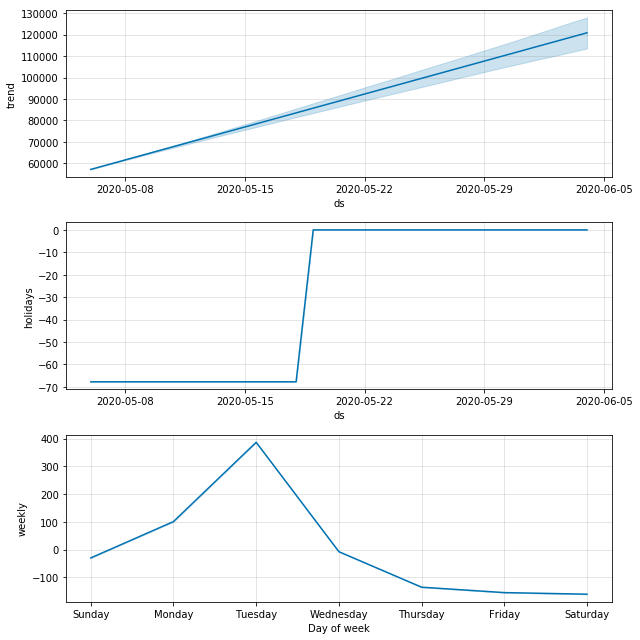

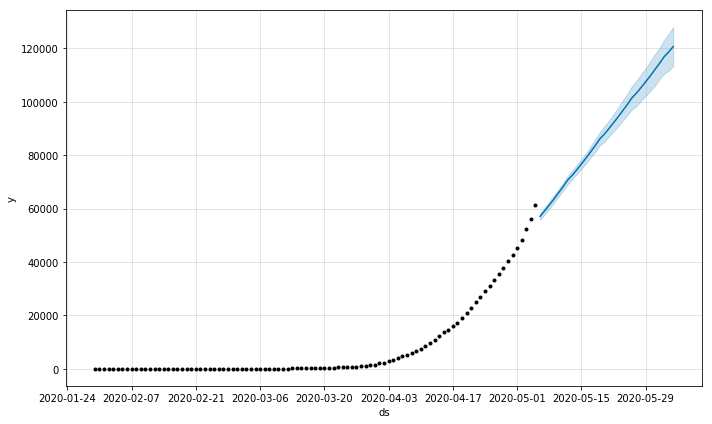

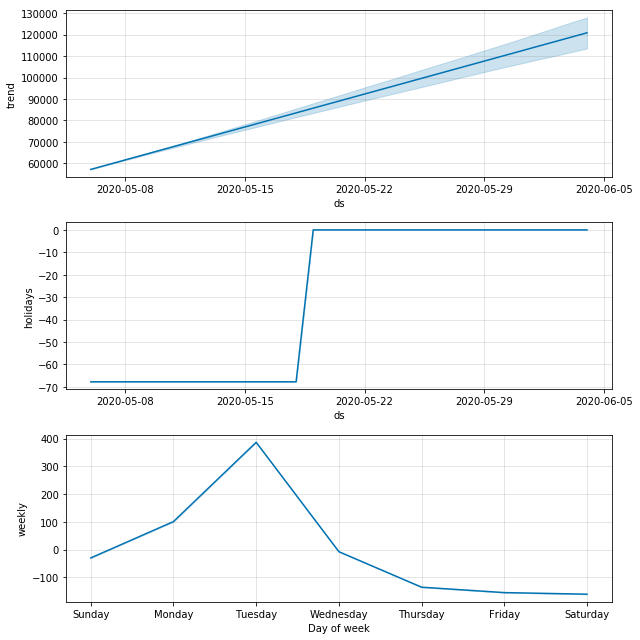

In [36]:
#Forecasting of Total Cases for Next 30 Days
df = df_corona_in_india.groupby('Date')['Total Cases'].sum().reset_index()
# Assigining variables to dates and total cases(Target Class) 
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
# Prophet is a forcasting model made by Facebook
m = Prophet(holidays = holiday)
# Lets fit the model
m.fit(df)
# Getting the next 30 dates
future = m.make_future_dataframe(periods=30,include_history = False)
#Obtaining the forcast for the next 30 days
forecast = m.predict(future)
#Lets plot on the graph for a easy view and understanding
fig = go.Figure()
# yhat is the predicted value ds is the dates 
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'],
                    mode='lines+markers',name='Cases',marker_color='Black'))
fig.update_layout(
    title='Forecasting of Total Cases in INDIA for Next 30 Days',xaxis_title="Date",
    yaxis_title="Count")
fig.show()
from fbprophet.diagnostics import cross_validation
# help(cross_validation)
df_cv = cross_validation(m, horizon='30 days', period='15 days', initial='1 days')
print(forecast)
m.plot(forecast)
m.plot_components(forecast)

   horizon           mse          rmse           mae      mape     mdape  \
0   3 days  2.641816e+06   1625.366514    793.694370  0.499637  0.691580   
1   4 days  3.576888e+06   1891.266175    931.656075  0.574926  0.730159   
2   5 days  4.850137e+06   2202.302754   1085.575188  0.644064  0.757227   
3   6 days  6.555957e+06   2560.460354   1259.904456  0.680995  0.774251   
4   7 days  8.826055e+06   2970.867691   1465.283915  0.682690  0.790610   
5   8 days  1.195776e+07   3457.999984   1706.663932  0.679173  0.793537   
6   9 days  1.679955e+07   4098.725289   2026.196880  0.694479  0.831143   
7  10 days  2.261376e+07   4755.392554   2361.769276  0.753017  0.864111   
8  11 days  2.861453e+07   5349.254872   2691.475410  0.835064  0.887132   
9  12 days  3.461609e+07   5883.543951   2986.012541  0.919865  0.887532   
10 13 days  4.113751e+07   6413.852673   3298.867443  0.987606  0.897676   
11 14 days  4.954621e+07   7038.907148   3661.756730  1.040130  0.897676   
12 15 days  

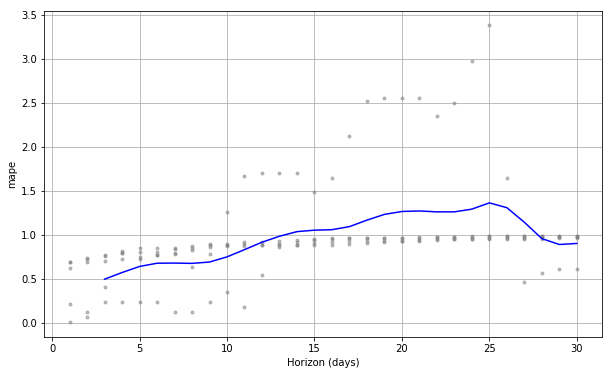

In [37]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
print(df_p)
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-03-21 00:00:00 and 2020-04-05 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


           ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2020-03-13   -12.573912   -42.144859    12.343724   -12.573912   
1  2020-03-14    -9.153112   -39.430137    14.051009    -9.153112   
2  2020-03-15    -5.732311   -38.749302    16.974993    -5.732311   
3  2020-03-16    -2.311510   -29.644080    24.104505    -2.311510   
4  2020-03-17     1.109290   -10.931377    44.962060     1.109290   
5  2020-03-18     4.530091   -23.240086    31.206467     4.530091   
6  2020-03-19     7.950997   -21.962690    30.677680     7.950997   
7  2020-03-20    11.371902   -15.102115    37.974273    11.371902   
8  2020-03-21    14.797577   -15.918705    39.435235    14.797577   
9  2020-03-22    18.225101   -13.479967    39.276836    18.225101   
10 2020-03-23    21.652626    -4.152152    47.303121    21.652626   
11 2020-03-24    25.484833    -6.142571    45.470670    25.484833   
12 2020-03-25    29.317041   -20.428201    35.525213    29.317041   
13 2020-03-26    33.156979   -18.9

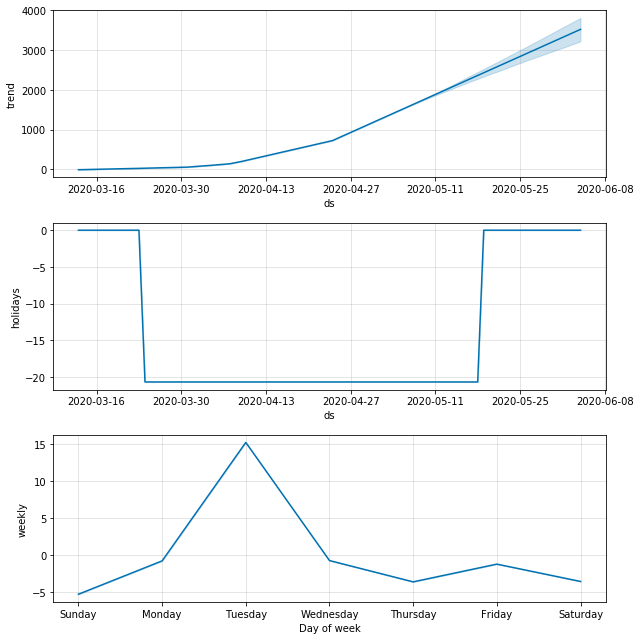

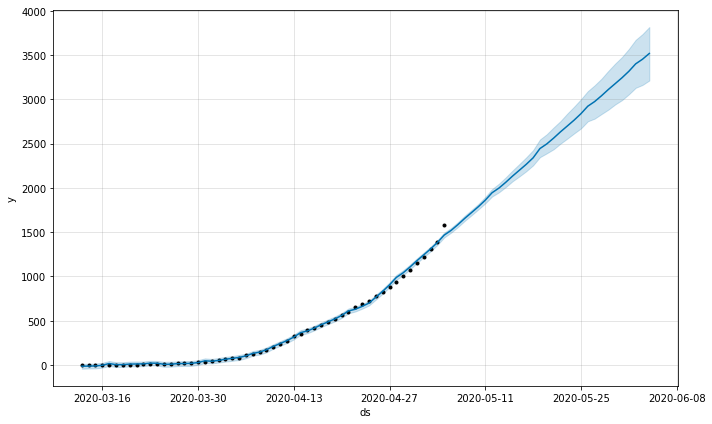

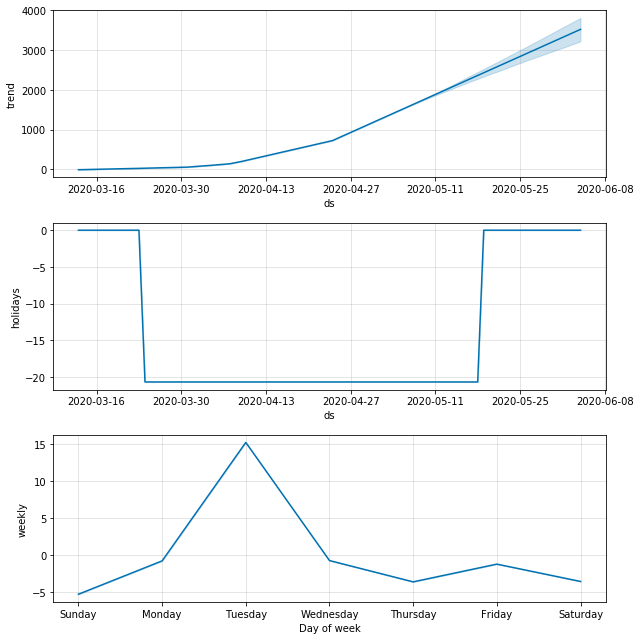

In [38]:
#Forecasting of Deaths for Next 30 Days
df = df_corona_in_india.groupby('Date')['Deaths'].sum().reset_index()
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
#Removing the dates when no deaths were reported 
df = df[43:].reset_index().drop(['index'],axis=1)
m = Prophet(holidays = holiday )
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'],
                    mode='lines+markers',name='Cases',marker_color='red'))
fig.update_layout(
    title='Forecasting of Deaths in INDIA for Next 30 Days',xaxis_title="Date",
    yaxis_title="Count")
fig.show()
from fbprophet.diagnostics import cross_validation
# help(cross_validation)
df_cv = cross_validation(m, horizon='30 days', period='15 days', initial='1 days')
print(forecast)
m.plot(forecast)
m.plot_components(forecast)

   horizon            mse        rmse         mae      mape     mdape  \
0   3 days    2098.323121   45.807457   33.179119  0.430067  0.428303   
1   4 days    3145.266092   56.082672   40.639517  0.460967  0.458946   
2   5 days    5126.424190   71.599052   52.510579  0.517601  0.550771   
3   6 days    8075.033156   89.861188   66.145811  0.574854  0.582459   
4   7 days   12092.006314  109.963659   81.905914  0.624735  0.636951   
5   8 days   19012.841169  137.887059  102.859810  0.676198  0.654794   
6   9 days   26300.998863  162.175827  122.454699  0.715471  0.734062   
7  10 days   35532.092650  188.499583  144.035598  0.751729  0.748235   
8  11 days   43126.317933  207.668770  159.662663  0.766544  0.764570   
9  12 days   51593.754187  227.142586  176.700391  0.779348  0.764570   
10 13 days   60605.583801  246.182014  194.002290  0.795634  0.785435   
11 14 days   70937.757306  266.341430  213.095726  0.809779  0.800492   
12 15 days   85050.784877  291.634677  235.216289  

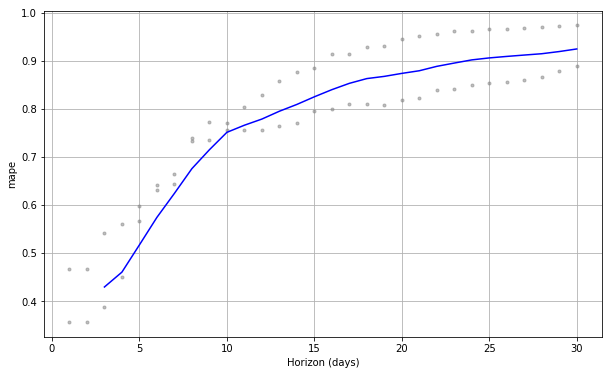

In [39]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
print(df_p)
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

